# Descriptive Analysis Notebook

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Upload data
url = "https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/mxmh_survey_results.csv"
data = pd.read_csv(url)
data.head(n=3)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.


In [18]:
# Getting basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [19]:
# Dropping null values
data = data.dropna()

# Dropping irrelevant columns not helpful for modeling + depression, ocd, etc since we are not using these
data = data.drop(columns=["Timestamp", "Permissions", "Depression", "Insomnia", "OCD"])

# remapping the responses to numbers
freq_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Very frequently": 3
}

for col in [c for c in data.columns if "Frequency" in c]:
    data[col] = data[col].map(freq_map)

df_encoded = pd.get_dummies(data,
                            columns=[
                                "Primary streaming service",
                                "Fav genre",
                                "Music effects",
                                "While working",
                                "Instrumentalist",
                                "Composer",
                                "Exploratory",
                                "Foreign languages"
                            ],
                            drop_first=True)  # optional to avoid multicollinearity if any

df_encoded.head(n=3)

,Age,Hours per day,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Music effects_No effect,Music effects_Worsen,While working_Yes,Instrumentalist_Yes,Composer_Yes,Exploratory_Yes,Foreign languages_Yes
2,18.0,4.0,132.0,0,0,3,0,0,1,1,...,False,False,True,True,False,False,False,False,False,True
3,61.0,2.5,84.0,2,0,0,1,2,0,3,...,False,False,False,False,False,True,False,True,True,True
4,18.0,4.0,107.0,0,0,1,0,1,3,0,...,False,False,False,False,False,True,False,False,True,False


In [20]:
# some basic demographic statistics
df_encoded['Age'].describe()

count    616.000000
mean      24.792208
std       11.658515
min       10.000000
25%       18.000000
50%       21.000000
75%       27.000000
max       89.000000
Name: Age, dtype: float64

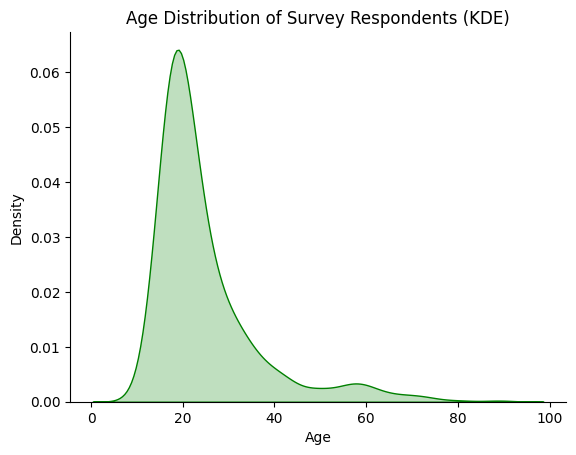

In [21]:
# Create a kde graph of age distribution
sns.kdeplot(df_encoded['Age'], fill=True, color='green')
plt.title('Age Distribution of Survey Respondents (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
# remove spines
sns.despine()
plt.show()

Text(0, 0.5, 'Number of Respondents')

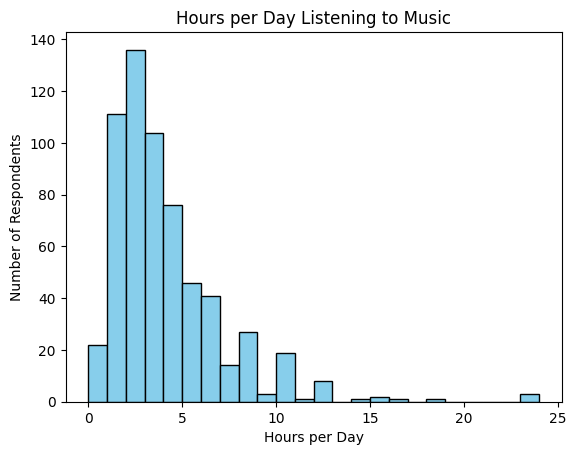

In [22]:
plt.hist(df_encoded['Hours per day'], bins=range(0, 25, 1), edgecolor='black', color='skyblue')
plt.title('Hours per Day Listening to Music')
plt.xlabel('Hours per Day')
plt.ylabel('Number of Respondents')

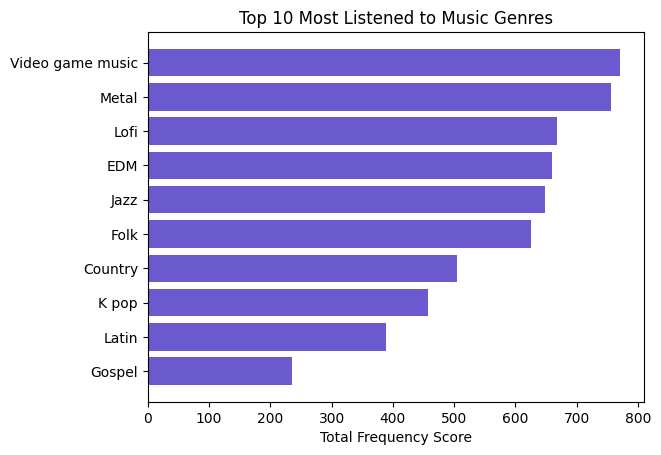

In [23]:
# Top 10 most listened to music genres
genre_cols = [col for col in df_encoded.columns if "Frequency [" in col]
genre_sums = df_encoded[genre_cols].sum().sort_values(ascending=True).head(10)
plt.barh(genre_sums.index.str.replace("Frequency [", "").str.replace("]", ""), genre_sums.values, color='slateblue')
plt.title('Top 10 Most Listened to Music Genres')
plt.xlabel('Total Frequency Score')
plt.show()


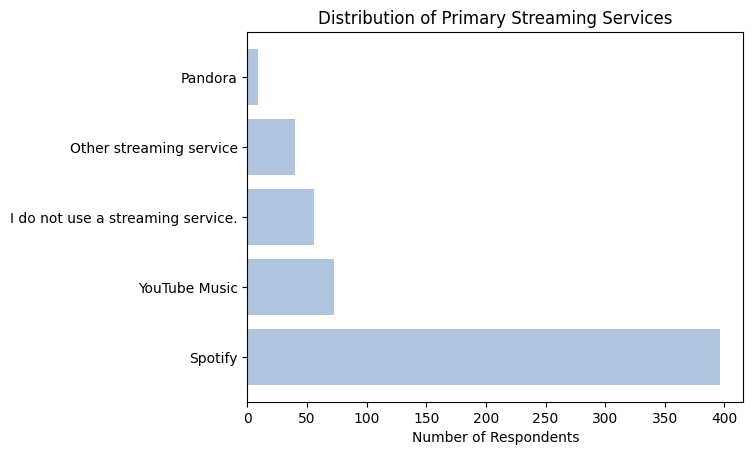

In [24]:
# Distribution of streaming services
streaming_service_cols = [col for col in df_encoded.columns if "Primary streaming service_" in col]
streaming_service_sums = df_encoded[streaming_service_cols].sum().sort_values(ascending=False)
plt.barh(streaming_service_sums.index.str.replace("Primary streaming service_", ""), streaming_service_sums.values, color='lightsteelblue')
plt.title('Distribution of Primary Streaming Services')
plt.xlabel('Number of Respondents')
plt.show()

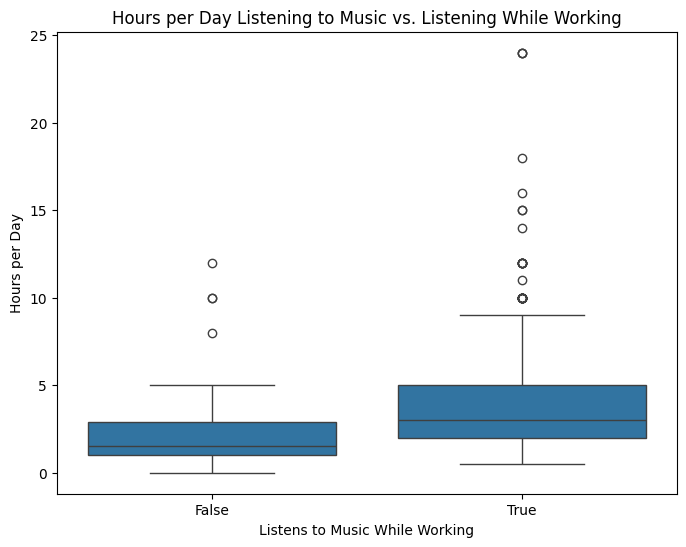

In [25]:
# Do people who listen to music while working report higher hours of listening?
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='While working_Yes', y='Hours per day', data=df_encoded)
plt.title('Hours per Day Listening to Music vs. Listening While Working')
plt.xlabel('Listens to Music While Working')
plt.ylabel('Hours per Day')
plt.show()

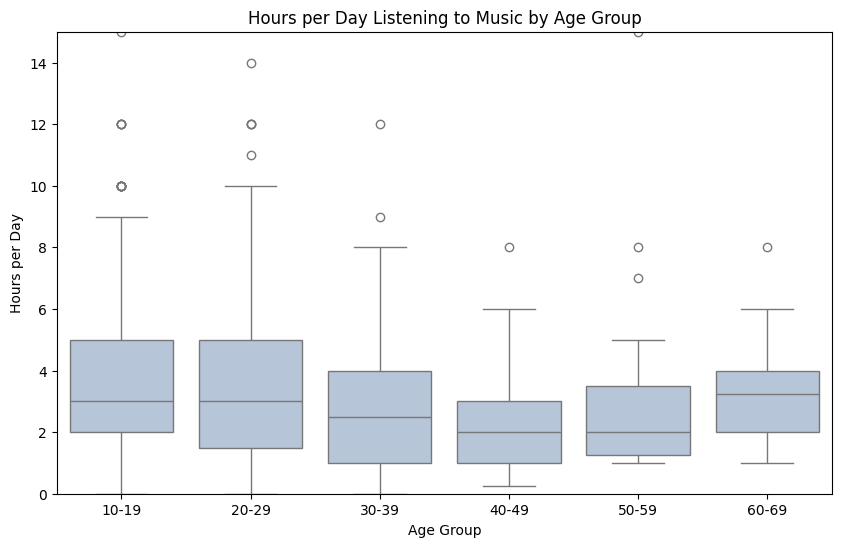

In [26]:
# Hours per day listening to music by age group
df_encoded['Age Group'] = pd.cut(df_encoded['Age'], bins=[10, 20, 30, 40, 50, 60, 70],
                                 labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Hours per day', data=df_encoded,  color='lightsteelblue')
plt.title('Hours per Day Listening to Music by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Hours per Day')
plt.ylim(0, 15)
plt.show()